In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load converters and take the conversion time from that excel

In [4]:
pwd

'/local_mount/space/celer/1/users/notebooks/moises'

In [5]:
conv=pd.read_excel("/local_mount/space/celer/1/users/notebooks/moises/excels/conv_with_time.xlsx", engine="openpyxl", index_col=0)

In [6]:
conv=conv.dropna()

In [7]:
del conv['present']
del conv['EXAMDATE']

In [8]:
conv

,days_to_conv
002_S_0729,418
002_S_1268,2178
003_S_1057,755
003_S_1074,3338
005_S_0222,376
...,...
137_S_0973,1181
137_S_0994,1451
141_S_1004,182
941_S_1295,539


In [ ]:
#Load MMSE, THIS IS THE MMSE THAT WE DID NOT USE, WE USED THE ONE FROM MERGE

In [ ]:
mmse=pd.read_excel('5folds_preds&MMSE.xlsx',engine='openpyxl',index_col=0)

In [ ]:
mmse

In [ ]:
#Load MCD data

In [ ]:
mc=pd.read_excel("mc_preds_SD500_processed.xlsx",engine='openpyxl',index_col=0)

In [ ]:
mc

In [ ]:
results=pd.concat((mc,conv), axis=1)

In [ ]:
results=results.dropna(subset=['MC_pred'])

In [ ]:
results

In [ ]:
results=pd.concat((results,mmse),axis=1)

In [ ]:
results

In [ ]:
#Get time of follow up

In [ ]:
dx=pd.read_csv('DXSUM_PDXCONV_ADNIALL.csv')

In [ ]:
dx=dx.set_index('PTID')

In [ ]:
b=dict(dx['EXAMDATE'])

In [ ]:
from datetime import datetime
import math

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [ ]:
a=list(results.index)

In [ ]:
list(b.get('037_S_0552'))

In [ ]:
timef={}
for i in a:
    c=b.get(i)
    c=list(c)
    newlist=[]
    for item in c:
        if str(item) != 'nan':
            newlist.append(item)
    c=newlist
    print(i)
    if len(c[-1])>1:
        print("Started",c[0],"Ended",c[-1])
        d=days_between(c[0],c[-1])
        print("Days of followup:",d)
        timef.update({i: d})
    else:
        print("Single date")

In [ ]:
len(timef)

In [ ]:
time_fol=pd.DataFrame.from_dict(timef, orient='index', columns=['Followup'])

In [ ]:
time_fol

In [ ]:
results=pd.concat((results,time_fol),axis=1)

In [ ]:
results=results.dropna(subset=['MC_pred'])

In [ ]:
#Load demographic variables, MMSE_dem IS THE ONE USED IN THE PAPER

In [ ]:
demog=pd.read_excel("processed_demog.xlsx", engine="openpyxl", index_col=0)

In [ ]:
results=pd.concat((results,demog),axis=1)

In [ ]:
results

In [ ]:
results.to_excel("finally_results_dataset.xlsx")

## Start here

In [ ]:
"""From here on I look into different things, a lot of this came into the paper

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results=pd.read_excel("finally_results_dataset.xlsx",engine='openpyxl',index_col=0)

In [3]:
#This line serves only to filter for the TableOne, if not is better to leave them as 0 and 1
results['Conversion'].replace([0,1],["sMCI","pMCI"],inplace=True)

In [3]:
results

,Conversion,MC_pred,SD,days_to_conv,MMSE,pred,Followup,Followup_years,Gender,Age,Cohort,Education_years,APOE4,MMSE_dem,MOCA
041_S_1418,0,0.201659,0.054424,NaN,NaN,0.218482,3658.0,10.021918,Male,81.5,ADNI1,12.0,0.0,29.0,NaN
041_S_0679,0,0.145866,0.048478,NaN,NaN,0.152578,5673.0,15.542466,Male,62.9,ADNI1,18.0,0.0,29.0,NaN
021_S_0178,0,0.260914,0.091332,NaN,NaN,0.252711,5521.0,15.126027,Male,64.8,ADNI1,20.0,0.0,29.0,NaN
003_S_0908,0,0.083336,0.023164,NaN,30.0,0.084422,5494.0,15.052055,Female,62.9,ADNI1,16.0,0.0,NaN,NaN
003_S_1122,0,0.216492,0.054589,NaN,26.0,0.214708,5423.0,14.857534,Female,76.6,ADNI1,14.0,0.0,26.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
016_S_6939,0,0.552913,0.067572,NaN,NaN,0.558967,NaN,0.000000,Male,73.5,ADNI3,17.0,NaN,29.0,22.0
037_S_6627,0,0.231582,0.039356,NaN,NaN,0.235761,0.0,0.000000,Female,67.7,ADNI3,14.0,2.0,25.0,NaN
127_S_1210,0,0.897105,0.036924,NaN,NaN,0.905659,NaN,0.000000,Male,74.2,ADNI1,17.0,0.0,30.0,NaN
013_S_6206,0,0.100928,0.036040,NaN,NaN,0.099617,0.0,0.000000,Male,81.9,ADNI3,16.0,1.0,30.0,25.0


In [8]:
results.describe()

,MC_pred,SD,days_to_conv,MMSE,pred,Followup,Followup_years,Age,Education_years,APOE4,MMSE_dem,MOCA
count,373.000000,373.000000,106.000000,74.000000,373.000000,363.000000,373.000000,373.000000,364.000000,327.000000,343.000000,192.000000
mean,0.323845,0.045975,1063.575472,25.918919,0.330333,1349.118457,3.597121,73.420021,15.961538,0.587156,27.236152,22.598958
std,0.290615,0.026480,893.715348,3.895050,0.294907,1228.873639,3.374595,7.459860,2.715866,0.672113,2.353218,3.604912
min,0.001646,0.000725,0.000000,12.000000,0.001529,0.000000,0.000000,55.100000,8.000000,0.000000,9.000000,10.000000
25%,0.072430,0.023164,405.500000,24.000000,0.073096,441.500000,1.156164,68.900000,14.000000,0.000000,26.000000,21.000000
50%,0.234973,0.048509,731.000000,27.000000,0.244130,1088.000000,2.668493,73.900000,16.000000,0.000000,28.000000,23.000000
75%,0.532054,0.063340,1411.000000,29.000000,0.545129,1825.500000,4.846575,78.800000,18.000000,1.000000,29.000000,25.000000
max,0.989956,0.137047,3695.000000,30.000000,0.990844,5673.000000,15.542466,90.000000,20.000000,2.000000,30.000000,30.000000


array([[<AxesSubplot:title={'center':'MC_pred'}>,
        <AxesSubplot:title={'center':'SD'}>,
        <AxesSubplot:title={'center':'days_to_conv'}>],
       [<AxesSubplot:title={'center':'MMSE'}>,
        <AxesSubplot:title={'center':'pred'}>,
        <AxesSubplot:title={'center':'Followup'}>],
       [<AxesSubplot:title={'center':'Followup_years'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education_years'}>],
       [<AxesSubplot:title={'center':'APOE4'}>,
        <AxesSubplot:title={'center':'MMSE_dem'}>,
        <AxesSubplot:title={'center':'MOCA'}>]], dtype=object)

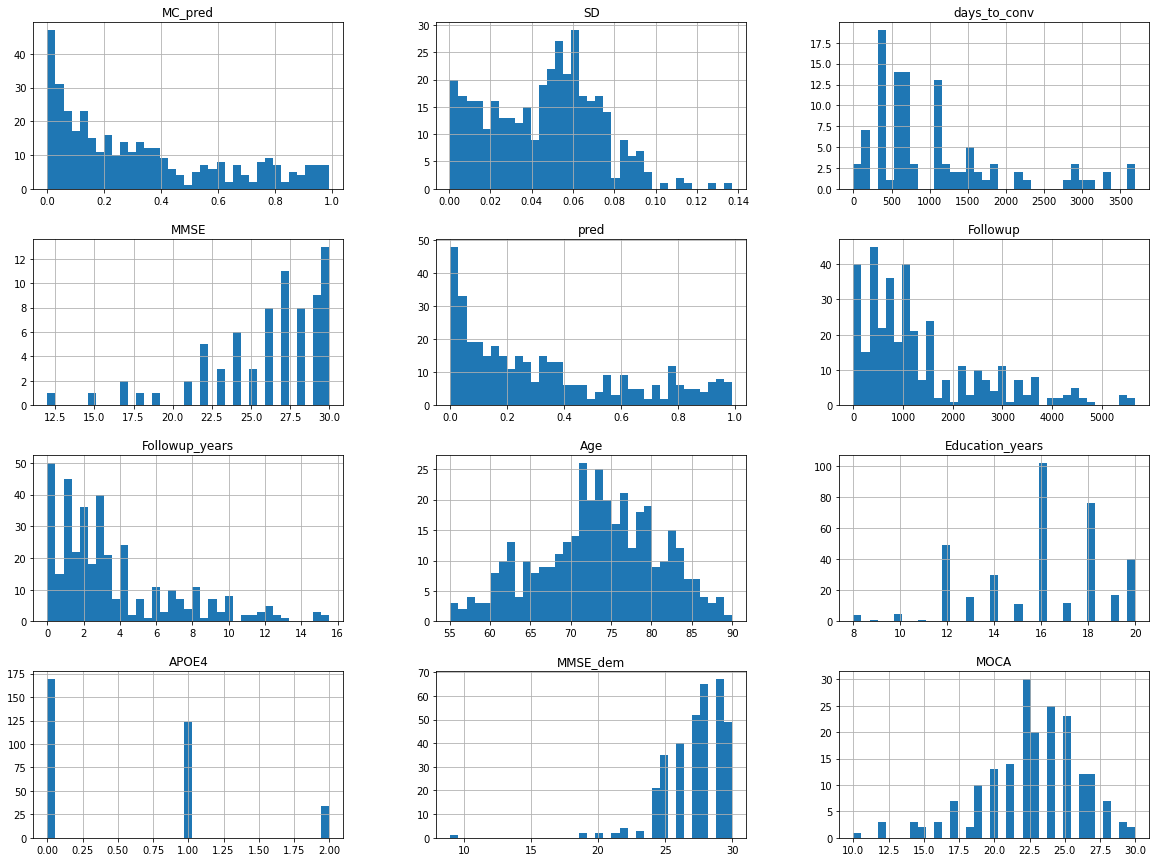

In [10]:
results.hist(bins=35, figsize=(20,15))

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from tqdm.notebook import tqdm, trange
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf

In [ ]:
## Pooled val datasets prediction AUC, this is the one from Sup Material

Area under ROC curve is:  0.8266553600452263


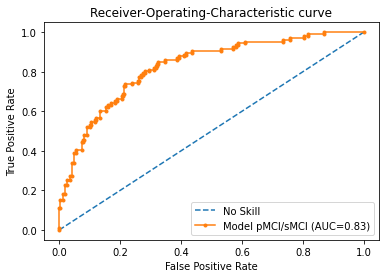

Accuracy with standard threshold:  0.7908847184986595
S-E Best Threshold=0.313609, G-Mean=0.759
Accuracy with adjusted threshold:  0.7426273458445041
Sensitivity:  0.8018867924528302
Specificity:  0.7191011235955056
PPV:  0.53125
NPV:  0.9014084507042254


In [4]:
auc=roc_auc_score(results["Conversion"], results["pred"])
print("Area under ROC curve is: ",auc)
# calculate roc curves
fpr, tpr, thresholds = roc_curve(results["Conversion"], results["pred"], drop_intermediate=True)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Model pMCI/sMCI (AUC=%.2f)' % auc)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.title("Receiver-Operating-Characteristic curve")
pyplot.show()
print("Accuracy with standard threshold: ",accuracy_score(results["Conversion"], 
                                                          (1*np.asarray(tf.greater(results['pred'], 0.5)))))
print('S-E Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print("Accuracy with adjusted threshold: ",accuracy_score(results["Conversion"], 
                                                          (1*np.asarray(tf.greater(results['pred'], 0.313609)))))
tn, fp, fn, tp = confusion_matrix(results["Conversion"], 
                                        (1*np.asarray(tf.greater(results['pred'], 0.313609)))).ravel()
sens=tp/(tp+fn)
print("Sensitivity: ",sens)
spec=tn/(fp+tn)
print("Specificity: ", spec)
tpv=tp/(tp+fp)
print("PPV: ", tpv)
fpv=tn/(fn+tn)
print("NPV: ", fpv)

In [ ]:
#Same using MC pred, no difference

In [1]:
auc=roc_auc_score(results["Conversion"], results["MC_pred"])
print("Area under ROC curve is: ",auc)
# calculate roc curves
fpr, tpr, thresholds = roc_curve(results["Conversion"], results["MC_pred"], drop_intermediate=True)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Model pMCI/sMCI (AUC=%.2f)' % auc)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.title("Receiver-Operating-Characteristic curve")
pyplot.show()
print("Accuracy with standard threshold: ",accuracy_score(results["Conversion"], 
                                                          (1*np.asarray(tf.greater(results['MC_pred'], 0.5)))))
print('S-E Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print("Accuracy with adjusted threshold: ",accuracy_score(results["Conversion"], 
                                                          (1*np.asarray(tf.greater(results['MC_pred'], 0.313609)))))
tn, fp, fn, tp = confusion_matrix(results["Conversion"], 
                                        (1*np.asarray(tf.greater(results['pred'], 0.313609)))).ravel()
sens=tp/(tp+fn)
print("Sensitivity: ",sens)
spec=tn/(fp+tn)
print("Specificity: ", spec)
tpv=tp/(tp+fp)
print("PPV: ", tpv)
fpv=tn/(fn+tn)
print("NPV: ", fpv)

NameError: name 'roc_auc_score' is not defined

### Correlations

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.stats import pearsonr,spearmanr,kendalltau

In [ ]:
#Method to get pvalues all at once

In [6]:
def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
        return spearmanr(x,y)[1]
def kendalltau_pval(x,y):
        return kendalltau(x,y)[1]

In [7]:
p_matrix=results.corr(method=pearsonr_pval)

/autofs/space/celer_001/users/software/miniconda3/envs/DL/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [4]:
corr_matrix=results.corr(method='pearson')

In [5]:
corr_matrix['SD']

Conversion         0.178163
MC_pred            0.354326
SD                 1.000000
days_to_conv      -0.075079
MMSE              -0.036923
pred               0.367225
Followup           0.063821
Followup_years     0.059941
Age                0.120848
Education_years   -0.049792
APOE4              0.108866
MMSE_dem          -0.161235
MOCA              -0.098944
Name: SD, dtype: float64

In [9]:
 4.443288e-01

0.4443288

In [8]:
p_matrix['SD']

Conversion         5.461147e-04
MC_pred            1.786254e-12
SD                 1.000000e+00
days_to_conv       4.443288e-01
MMSE               7.547945e-01
pred               2.371031e-13
Followup           2.251344e-01
Followup_years     2.481731e-01
Age                1.955978e-02
Education_years    3.434861e-01
APOE4              4.918902e-02
MMSE_dem           2.745996e-03
MOCA               1.721247e-01
Name: SD, dtype: float64

In [79]:
corr_matrix['SD'].sort_values(ascending=False)

SD                 1.000000
pred               0.367225
MC_pred            0.354326
Conversion         0.178163
Age                0.120848
APOE4              0.108866
Followup           0.063821
Followup_years     0.059941
MMSE              -0.036923
Education_years   -0.049792
days_to_conv      -0.075079
MOCA              -0.098944
MMSE_dem          -0.161235
Name: SD, dtype: float64

In [26]:
a='Followup'
b='pred'

In [12]:
a='days_to_conv'
b='SD'

In [27]:
corr, pvalue= pearsonr(results.dropna(subset=[a])[a],results.dropna(subset=[a])[b])

In [28]:
print("Pearson's Correlation:",corr,"pvalue:",pvalue)

Pearson's Correlation: 0.11353549849129578 pvalue: 0.030565915668791136


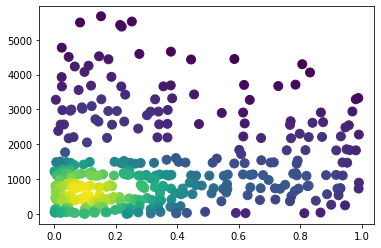

In [29]:
x=results.dropna(subset=[a])[a]
y=results.dropna(subset=[a])[b]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
ax.scatter(y, x, c=z, s=80)
plt.show()

### Conv years subsetting

In [5]:
controls=results[results['days_to_conv'].isnull()]

In [6]:
controls

,Conversion,MC_pred,SD,days_to_conv,MMSE,pred,Followup,Followup_years,Gender,Age,Cohort,Education_years,APOE4,MMSE_dem,MOCA
041_S_1418,0,0.201659,0.054424,NaN,NaN,0.218482,3658.0,10.021918,Male,81.5,ADNI1,12.0,0.0,29.0,NaN
041_S_0679,0,0.145866,0.048478,NaN,NaN,0.152578,5673.0,15.542466,Male,62.9,ADNI1,18.0,0.0,29.0,NaN
021_S_0178,0,0.260914,0.091332,NaN,NaN,0.252711,5521.0,15.126027,Male,64.8,ADNI1,20.0,0.0,29.0,NaN
003_S_0908,0,0.083336,0.023164,NaN,30.0,0.084422,5494.0,15.052055,Female,62.9,ADNI1,16.0,0.0,NaN,NaN
003_S_1122,0,0.216492,0.054589,NaN,26.0,0.214708,5423.0,14.857534,Female,76.6,ADNI1,14.0,0.0,26.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
016_S_6939,0,0.552913,0.067572,NaN,NaN,0.558967,NaN,0.000000,Male,73.5,ADNI3,17.0,NaN,29.0,22.0
037_S_6627,0,0.231582,0.039356,NaN,NaN,0.235761,0.0,0.000000,Female,67.7,ADNI3,14.0,2.0,25.0,NaN
127_S_1210,0,0.897105,0.036924,NaN,NaN,0.905659,NaN,0.000000,Male,74.2,ADNI1,17.0,0.0,30.0,NaN
013_S_6206,0,0.100928,0.036040,NaN,NaN,0.099617,0.0,0.000000,Male,81.9,ADNI3,16.0,1.0,30.0,25.0


In [5]:
oneyear=results[results['days_to_conv']<365]

In [7]:
len(oneyear)

14

In [8]:
oney=pd.concat((controls,oneyear),axis=0)

In [9]:
twoyear=results[results['days_to_conv']<730]

In [10]:
twoy=pd.concat((controls,twoyear),axis=0)

In [11]:
len(twoyear)

53

In [12]:
threeyear=results[results['days_to_conv']<(730+365)]

In [13]:
triy=pd.concat((controls,threeyear),axis=0)

In [14]:
len(threeyear)

67

In [7]:
fouryear=results[results['days_to_conv']<(730+365+365)]

In [8]:
fyear=pd.concat((controls,fouryear),axis=0)

In [9]:
len(fouryear)

81

In [10]:
myear=results[results['days_to_conv']>(730+365+365)]

In [11]:
len(myear)

25

In [12]:
myears=pd.concat((controls,myear),axis=0)

In [13]:
len(myears)

292

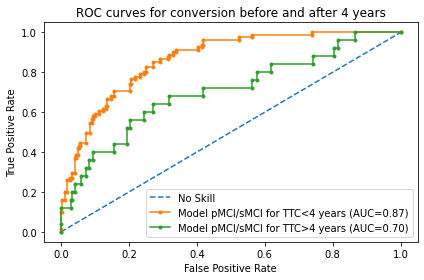

In [14]:
auc4=roc_auc_score(fyear["Conversion"], fyear["MC_pred"])
auc5=roc_auc_score(myears["Conversion"], myears["MC_pred"])

pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
# calculate roc curves

fpr4, tpr4, thresholds4 = roc_curve(fyear["Conversion"], fyear["MC_pred"], drop_intermediate=True)
pyplot.plot(fpr4, tpr4, marker='.', label='Model pMCI/sMCI for TTC<4 years (AUC=%.2f)' % auc4)

fpr5, tpr5, thresholds5 = roc_curve(myears["Conversion"], myears["MC_pred"], drop_intermediate=True)
pyplot.plot(fpr5, tpr5, marker='.', label='Model pMCI/sMCI for TTC>4 years (AUC=%.2f)' % auc5)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.title("ROC curves for conversion before and after 4 years")
plt.tight_layout()
pyplot.show()

In [48]:
gmeans1 = sqrt(tpr4 * (1-fpr4))
ix1 = np.argmax(gmeans1)

acc1=accuracy_score(fyear["Conversion"], (1*np.asarray(tf.greater(fyear['MC_pred'], 0.5))))

gmeans2 = sqrt(tpr5 * (1-fpr5))
ix2 = np.argmax(gmeans2)

acc2=accuracy_score(myears["Conversion"], (1*np.asarray(tf.greater(myears['MC_pred'], 0.5))))

##

tn, fp, fn, tp = confusion_matrix(fyear["Conversion"], 
                                        (1*np.asarray(tf.greater(fyear['MC_pred'], thresholds4[ix1])))).ravel()
sens=tp/(tp+fn)
spec=tn/(fp+tn)
tpv=tp/(tp+fp)
fpv=tn/(fn+tn)
fscore = (2 * tpv * sens) / (tpv + sens)


tn, fp, fn, tp = confusion_matrix(myears["Conversion"], 
                                        (1*np.asarray(tf.greater(myears['MC_pred'], thresholds5[ix2])))).ravel()
sens2=tp/(tp+fn)
spec2=tn/(fp+tn)
tpv2=tp/(tp+fp)
fpv2=tn/(fn+tn)
fscore2 = (2 * tpv2 * sens2) / (tpv2 + sens2)

In [50]:
print(thresholds4[ix1])

0.308775514364243


<ipython-input-49-798d95413317>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


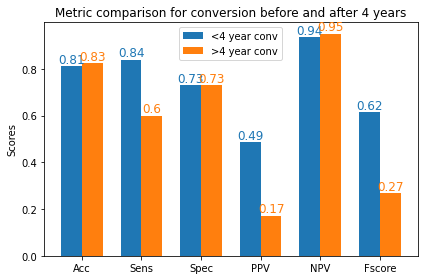

In [49]:
labels = ['Fake','Acc', 'Sens', 'Spec', 'PPV', 'NPV','Fscore']
x = np.arange(len(labels)-1)  # the label locations
width = 0.35  # the width of the bars

fyear_m = [acc1, sens, spec, tpv, fpv,fscore]
myears_m = [acc2, sens2, spec2, tpv2, fpv2,fscore2]

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fyear_m, width, label='<4 year conv')
rects2 = ax.bar(x + width/2, myears_m, width, label='>4 year conv')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Metric comparison for conversion before and after 4 years')
ax.set_xticklabels(labels)
ax.legend()

for bar in ax.patches:
    # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
    # Format the text with commas to separate thousands. You can do
    # any type of formatting here though.
    text = f'{round(bar_value,2):,}'
    # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # get_y() is where the bar starts so we add the height to it.
    text_y = bar.get_y() + bar_value
    # If we want the text to be the same color as the bar, we can
    # get the color like so:
    bar_color = bar.get_facecolor()
    # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

fig.tight_layout()

plt.show()

## Accuracies MC and all

In [124]:
acccs = np.loadtxt("allaccs.csv", delimiter=",")

In [128]:
acccs=np.ndarray.flatten(acccs)

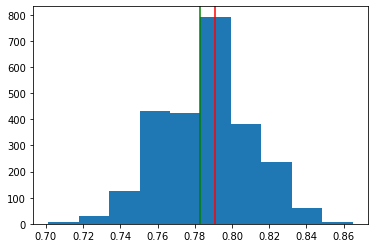

In [151]:
fig, ax = plt.subplots()
ax.hist(acccs)
ax.axvline(x=accuracy_score(results["Conversion"],(1*np.asarray(tf.greater(results['pred'], 0.5)))), color="r", 
            label='Base model acc')
ax.axvline(x=accuracy_score(results["Conversion"],(1*np.asarray(tf.greater(results['MC_pred'], 0.5)))), color="g",
           label='MC ensemble acc')
plt.show()

## SD ROC

In [51]:
a=list(results.index)
b=list(results['MC_pred'])
c=list(results['Conversion'])
t=0.308776

In [52]:
aciertos={}
for i,j in enumerate (a):
    pred_lab=None
    if b[i]>t:
        pred_lab=1
    if b[i]<t:
        pred_lab=0
    acierto=1-abs(c[i]-pred_lab)
    aciertos.update({j: acierto})    

In [53]:
aciert=pd.DataFrame.from_dict(aciertos, orient='index', columns=['Acierto'])

In [20]:
aciert

,Acierto
041_S_1418,1
041_S_0679,1
021_S_0178,1
003_S_0908,1
003_S_1122,1
...,...
016_S_6939,0
037_S_6627,1
127_S_1210,0
013_S_6206,1


In [54]:
results=pd.concat((results,aciert),axis=1)

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from tqdm.notebook import tqdm, trange
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf

In [56]:
SD=1-results["SD"]

Area under ROC curve is:  0.7385800350796919


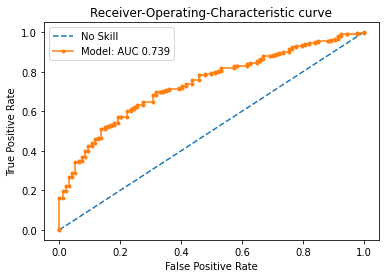

Accuracy with standard threshold:  0.7479892761394102
S-E Best Threshold=0.944950, G-Mean=0.688
Accuracy with adjusted threshold:  0.6890080428954424
Sensitivity:  0.6917562724014337
Specificity:  0.6808510638297872
PPV:  0.8654708520179372
NPV:  0.4266666666666667


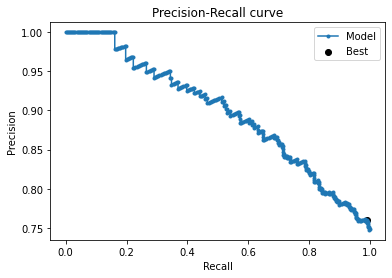

S-TPV Best Threshold=0.908668, F-Score=0.860


In [57]:
auc=roc_auc_score(results["Acierto"], SD)
print("Area under ROC curve is: ",auc)
# calculate roc curves
fpr, tpr, thresholds = roc_curve(results["Acierto"], SD, drop_intermediate=True)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Model: AUC %.3f' % auc)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.title("Receiver-Operating-Characteristic curve")
pyplot.show()
print("Accuracy with standard threshold: ",accuracy_score(results["Acierto"], 
                                                          (1*np.asarray(tf.greater(SD, 0.5)))))
print('S-E Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print("Accuracy with adjusted threshold: ",accuracy_score(results["Acierto"], 
                                                          (1*np.asarray(tf.greater(SD, 0.944950)))))
tn, fp, fn, tp = confusion_matrix(results["Acierto"], 
                                        (1*np.asarray(tf.greater(SD, 0.944950)))).ravel()
sens=tp/(tp+fn)
print("Sensitivity: ",sens)
spec=tn/(fp+tn)
print("Specificity: ", spec)
tpv=tp/(tp+fp)
print("PPV: ", tpv)
fpv=tn/(fn+tn)
print("NPV: ", fpv)


# calculate pr curves
precision, recall, thresholds = precision_recall_curve(results["Acierto"], SD)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
# plot the pr curve for the model
pyplot.plot(recall, precision, marker='.', label='Model')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.title("Precision-Recall curve")
pyplot.show()
print('S-TPV Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

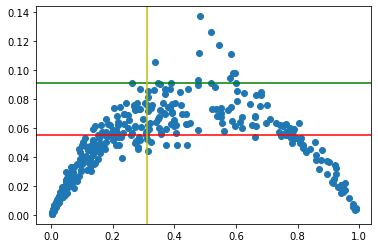

In [91]:
plt.scatter(results['MC_pred'],results['SD'])
plt.axhline(y=(1-0.908668), color='g', linestyle='-')
plt.axhline(y=(1-0.944950), color='r', linestyle='-')
plt.axvline(x=0.31, color='y', linestyle='-')

In [58]:
1-0.908668

0.09133199999999997

In [78]:
model_trust_metric=results['pred']*results['SD']

In [80]:
model_trust_metric=model_trust_metric*-1

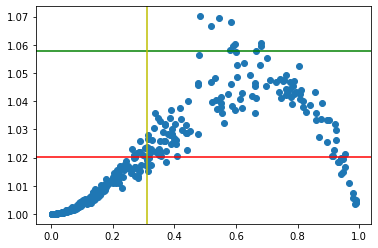

In [90]:
plt.scatter(results['MC_pred'],1-model_trust_metric)
plt.axhline(y=1+0.057718, color='g', linestyle='-')
plt.axhline(y=1+0.020151, color='r', linestyle='-')
plt.axvline(x=0.31, color='y', linestyle='-')

Area under ROC curve is:  0.7630214291161442


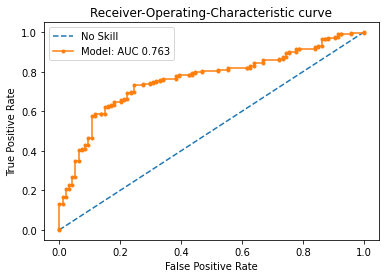

Accuracy with standard threshold:  0.2520107238605898
S-E Best Threshold=-0.020151, G-Mean=0.743
Accuracy with adjusted threshold:  0.7345844504021448
Sensitivity:  0.7275985663082437
Specificity:  0.7553191489361702
PPV:  0.8982300884955752
NPV:  0.48299319727891155


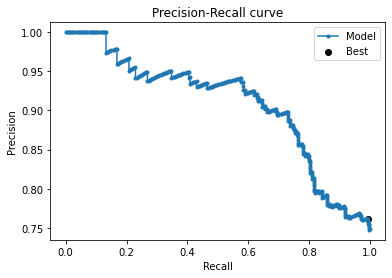

S-TPV Best Threshold=-0.057718, F-Score=0.862


In [81]:
auc=roc_auc_score(results["Acierto"], model_trust_metric)
print("Area under ROC curve is: ",auc)
# calculate roc curves
fpr, tpr, thresholds = roc_curve(results["Acierto"], model_trust_metric, drop_intermediate=True)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Model: AUC %.3f' % auc)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.title("Receiver-Operating-Characteristic curve")
pyplot.show()
print("Accuracy with standard threshold: ",accuracy_score(results["Acierto"], 
                                                          (1*np.asarray(tf.greater(model_trust_metric, 0.5)))))
print('S-E Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print("Accuracy with adjusted threshold: ",accuracy_score(results["Acierto"], 
                                                          (1*np.asarray(tf.greater(model_trust_metric, -0.020151)))))
tn, fp, fn, tp = confusion_matrix(results["Acierto"], 
                                        (1*np.asarray(tf.greater(model_trust_metric, -0.020151)))).ravel()
sens=tp/(tp+fn)
print("Sensitivity: ",sens)
spec=tn/(fp+tn)
print("Specificity: ", spec)
tpv=tp/(tp+fp)
print("PPV: ", tpv)
fpv=tn/(fn+tn)
print("NPV: ", fpv)
# calculate pr curves
precision, recall, thresholds = precision_recall_curve(results["Acierto"], model_trust_metric)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
# plot the pr curve for the model
pyplot.plot(recall, precision, marker='.', label='Model')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.title("Precision-Recall curve")
pyplot.show()
print('S-TPV Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

## Table 1

In [5]:
from tableone import TableOne, load_dataset

In [6]:
results

/autofs/space/celer_001/users/software/miniconda3/envs/DL/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Conversion,MC_pred,SD,days_to_conv,MMSE,pred,Followup,Followup_years,Gender,Age,Cohort,Education_years,APOE4,MMSE_dem,MOCA
041_S_1418,sMCI,0.201659,0.054424,NaN,NaN,0.218482,3658.0,10.021918,Male,81.5,ADNI1,12.0,0.0,29.0,NaN
041_S_0679,sMCI,0.145866,0.048478,NaN,NaN,0.152578,5673.0,15.542466,Male,62.9,ADNI1,18.0,0.0,29.0,NaN
021_S_0178,sMCI,0.260914,0.091332,NaN,NaN,0.252711,5521.0,15.126027,Male,64.8,ADNI1,20.0,0.0,29.0,NaN
003_S_0908,sMCI,0.083336,0.023164,NaN,30.0,0.084422,5494.0,15.052055,Female,62.9,ADNI1,16.0,0.0,NaN,NaN
003_S_1122,sMCI,0.216492,0.054589,NaN,26.0,0.214708,5423.0,14.857534,Female,76.6,ADNI1,14.0,0.0,26.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
016_S_6939,sMCI,0.552913,0.067572,NaN,NaN,0.558967,NaN,0.000000,Male,73.5,ADNI3,17.0,NaN,29.0,22.0
037_S_6627,sMCI,0.231582,0.039356,NaN,NaN,0.235761,0.0,0.000000,Female,67.7,ADNI3,14.0,2.0,25.0,NaN
127_S_1210,sMCI,0.897105,0.036924,NaN,NaN,0.905659,NaN,0.000000,Male,74.2,ADNI1,17.0,0.0,30.0,NaN
013_S_6206,sMCI,0.100928,0.036040,NaN,NaN,0.099617,0.0,0.000000,Male,81.9,ADNI3,16.0,1.0,30.0,25.0


In [ ]:
cols=["1","2"]

In [7]:
cols= ['Age', 'Education_years','Gender', 'APOE4', 'Followup_years','MMSE_dem','MOCA','days_to_conv']

/autofs/space/celer_001/users/software/miniconda3/envs/DL/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
cats = ['Gender', 'APOE4']

/autofs/space/celer_001/users/software/miniconda3/envs/DL/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
group = 'Conversion'
nn= ['Followup_years','MMSE_dem','MMSE','days_to_conv']

/autofs/space/celer_001/users/software/miniconda3/envs/DL/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
mytable = TableOne(results, columns=cols, categorical=cats,
                   groupby=group, pval=True,dip_test=True, normal_test=True, tukey_test=True,htest_name=True,
                  nonnormal=nn)

/autofs/space/celer_001/users/software/miniconda3/envs/DL/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/autofs/space/celer_001/users/software/miniconda3/envs/DL/lib/python3.8/site-packages/tableone/tableone.py:1217: UserWarning: No P-Value was computed for days_to_conv due to the low number of observations.
  warnings.warn(msg)
/autofs/space/celer_001/users/software/miniconda3/envs/DL/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/autofs/space/celer_001/users/software/miniconda3/envs/DL/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN

In [14]:
mytable

/autofs/space/celer_001/users/software/miniconda3/envs/DL/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by Conversion                                                                                         
                                                    Missing               Overall                  pMCI              sMCI P-Value               Test
n                                                                             373                   106               267                           
Age, mean (SD)                                            0            73.4 (7.5)            74.7 (7.3)        72.9 (7.5)   0.039  Two Sample T-test
Education_years, mean (SD)                                9            16.0 (2.7)            16.0 (2.7)        15.9 (2.7)   0.797  Two Sample T-test
Gender, n (%)                  Female                     0            138 (37.0)             33 (31.1)        105 (39.3)   0.174        Chi-squared
                               Male                                    235 (63.0)             73 (68.9)        162 (60.7)                           
APOE4, n (%)                   0.0                       46            169 (51.7)             38 (36.5)        131 (58.7)   0.001        Chi-squared
                               1.0                                     124 (37.9)             50 (48.1)         74 (33.2)                           
                               2.0                                      34 (10.4)             16 (15.4)          18 (8.1)                           
Followup_years, median [Q1,Q3]                            0         2.7 [1.2,4.8]         4.6 [3.0,7.1]     2.1 [1.0,3.2]  <0.001     Kruskal-Wallis
MMSE_dem, median [Q1,Q3]                                 30      28.0 [26.0,29.0]      27.0 [25.0,28.0]  28.0 [26.0,29.0]  <0.001     Kruskal-Wallis
MOCA, mean (SD)                                         181            22.6 (3.6)            18.5 (4.6)        22.9 (3.3)   0.002  Two Sample T-test
days_to_conv, median [Q1,Q3]                            267  731.0 [405.5,1411.0]  731.0 [405.5,1411.0]     nan [nan,nan]     nan         Not tested
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: Education_years, Followup_years, MMSE_dem, MOCA, days_to_conv.
[2] Normality test reports non-normal
                                  distributions for: Followup_years, MMSE_dem, days_to_conv.
[3] Tukey test indicates far outliers
                                  in: Followup_years.